## Data Loading and Cleaning ##

In [1]:
import numpy as np
import pandas as pd

#The following data is a famous `Maternal Health Risk` dataset taken from UC Irvine Machine Learning Repository.
#Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh
#through the IoT based risk monitoring system.

columns = ['age',
           'SystolicBP', # blood pressure during contraction pf heart( in mmHg)
           'DiastolicBP', # blood pressure during relaxation of heart (in mmHg)
           'BS', # blood sugar (in milligrams per deciliter (mg/dL) )
           'Bodytemp',#(in degree celcius)
           'HeartRate',#(in bpm)
           'RiskLevel'] # Either high(1) or low(0)

# load dataset and assign column names
ds = pd.read_csv("Maternal Health Risk Data Set.csv",header=None, names=columns, na_values="?",skipinitialspace=True)
ds.drop(ds.index[0], inplace=True)

numeric_columns = ["age","SystolicBP","DiastolicBP","BS","Bodytemp","HeartRate"]
for column in numeric_columns:
    ds[column] = pd.to_numeric(ds[column], errors='coerce')

ds.head()    



,age,SystolicBP,DiastolicBP,BS,Bodytemp,HeartRate,RiskLevel
1,25,130,80,15.0,98.0,86,high risk
2,35,140,90,13.0,98.0,70,high risk
3,29,90,70,8.0,100.0,80,high risk
4,30,140,85,7.0,98.0,70,high risk
5,35,120,60,6.1,98.0,76,low risk


In [2]:
ds.describe() 

,age,SystolicBP,DiastolicBP,BS,Bodytemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 1 to 1014
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   Bodytemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
ds.isnull().sum()

age            0
SystolicBP     0
DiastolicBP    0
BS             0
Bodytemp       0
HeartRate      0
RiskLevel      0
dtype: int64

* Since all columns have zero `isnull` sum hence no `rows` with missing values are present in the dataset. *

In [5]:
# Removing duplicate rows to clear out redundancies present in dataset
duplicates = ds.duplicated().sum()
print("Number of duplicate rows present: ",duplicates)

Number of duplicate rows present:  562


In [21]:
ds.drop_duplicates(inplace=True)

## Exploratory Data Analysis ##

### Univariate Analysis ###

In [7]:
print("Summary statistics")
ds.describe()

Summary statistics


,age,SystolicBP,DiastolicBP,BS,Bodytemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [22]:
numeric_cols = ds.select_dtypes(include=[np.number]).columns
print("===== NUMERICAL SUMMARY =====")
print(ds[numeric_cols].describe())

# Additional statistics: variance, skewness, median, and mode
print("===== VARIANCE OF NUMERICAL COLUMNS =====\n")
print(ds[numeric_cols].var())

print("\n===== SKEWNESS OF NUMERICAL COLUMNS =====")
print(ds[numeric_cols].skew())

print("\n===== MEDIAN OF NUMERICAL COLUMNS =====")
print(ds[numeric_cols].median())

print("\n===== MODE OF NUMERICAL COLUMNS =====")
for col in numeric_cols:
    print(f"Mode of {col}: {ds[col].mode()[0]}")

===== NUMERICAL SUMMARY =====
              age  SystolicBP  DiastolicBP          BS    Bodytemp   HeartRate
count  452.000000  452.000000   452.000000  452.000000  452.000000  452.000000
mean    29.194690  110.553097    75.418142    8.346173   98.692478   73.949115
std     13.767379   17.872282    13.754578    2.829209    1.410897    8.156973
min     10.000000   70.000000    49.000000    6.000000   98.000000    7.000000
25%     19.000000   90.000000    65.000000    6.900000   98.000000   70.000000
50%     25.000000  120.000000    80.000000    7.500000   98.000000   76.000000
75%     35.000000  120.000000    86.000000    7.900000   98.000000   80.000000
max     70.000000  160.000000   100.000000   19.000000  103.000000   90.000000
===== VARIANCE OF NUMERICAL COLUMNS =====

age            189.540726
SystolicBP     319.418460
DiastolicBP    189.188406
BS               8.004424
Bodytemp         1.990631
HeartRate       66.536208
dtype: float64

===== SKEWNESS OF NUMERICAL COLUMNS =====
ag


===== FREQUENCY DISTRIBUTIONS FOR CATEGORICAL VARIABLES =====

Value Counts for 'RiskLevel':
RiskLevel
low risk     234
high risk    112
mid risk     106
Name: count, dtype: int64


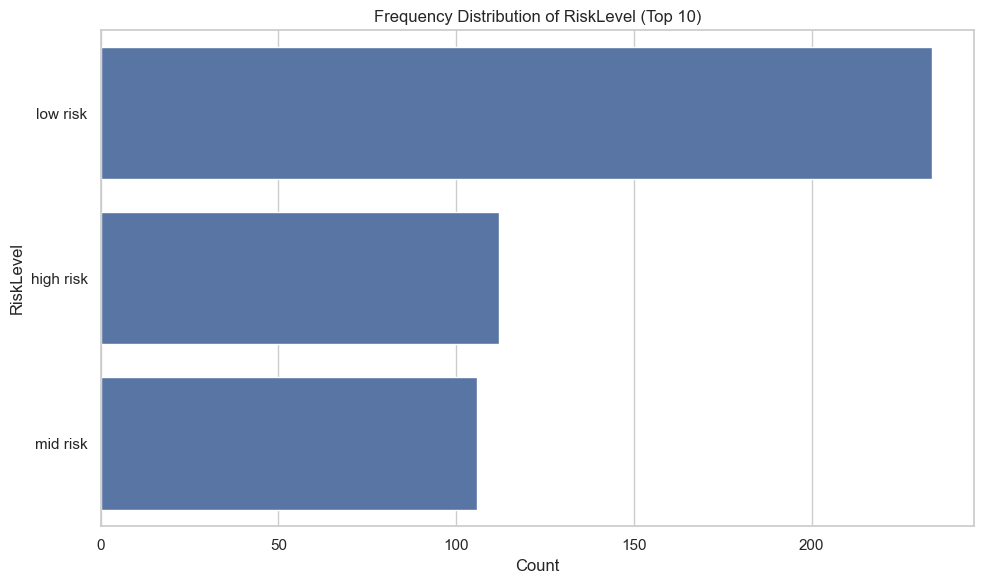

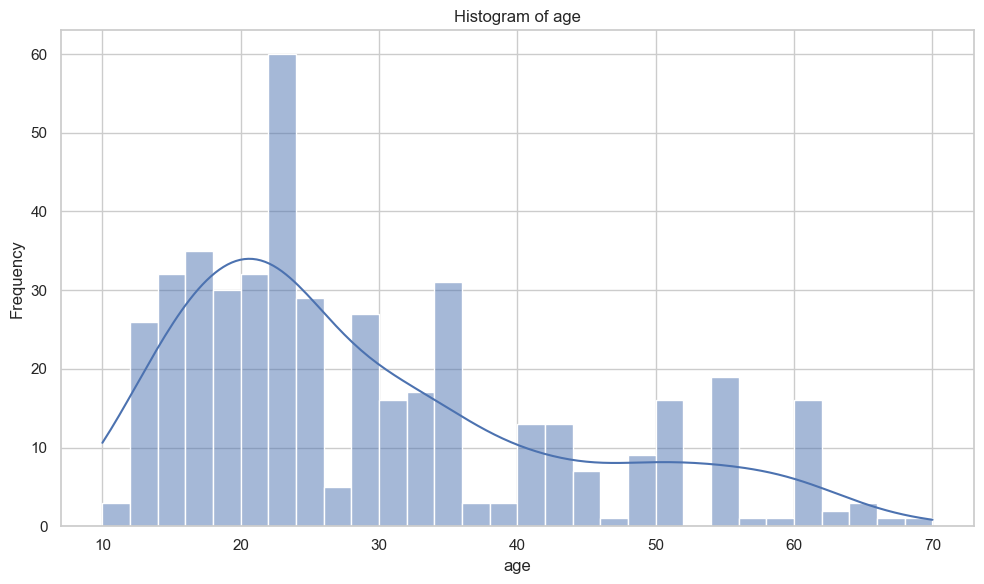

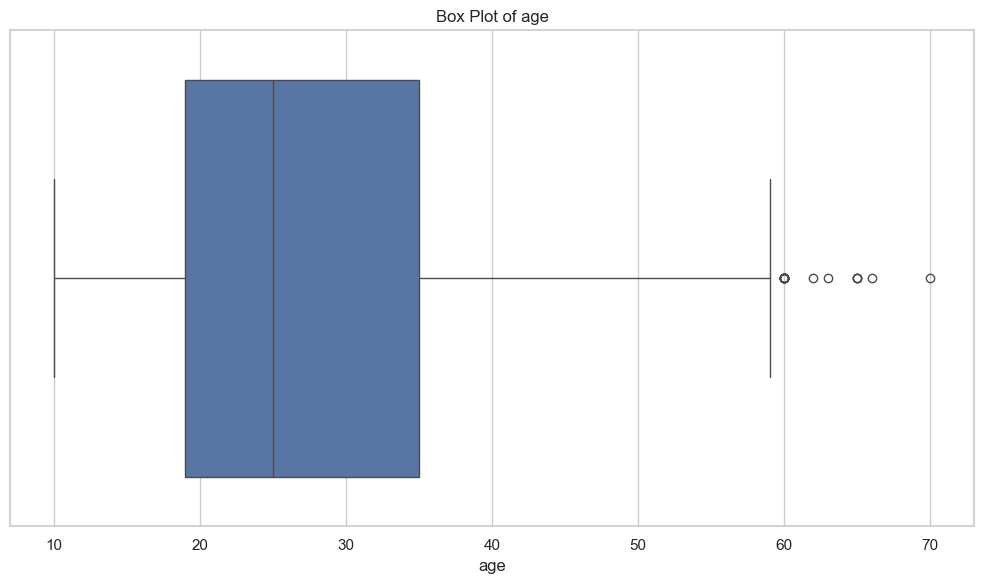

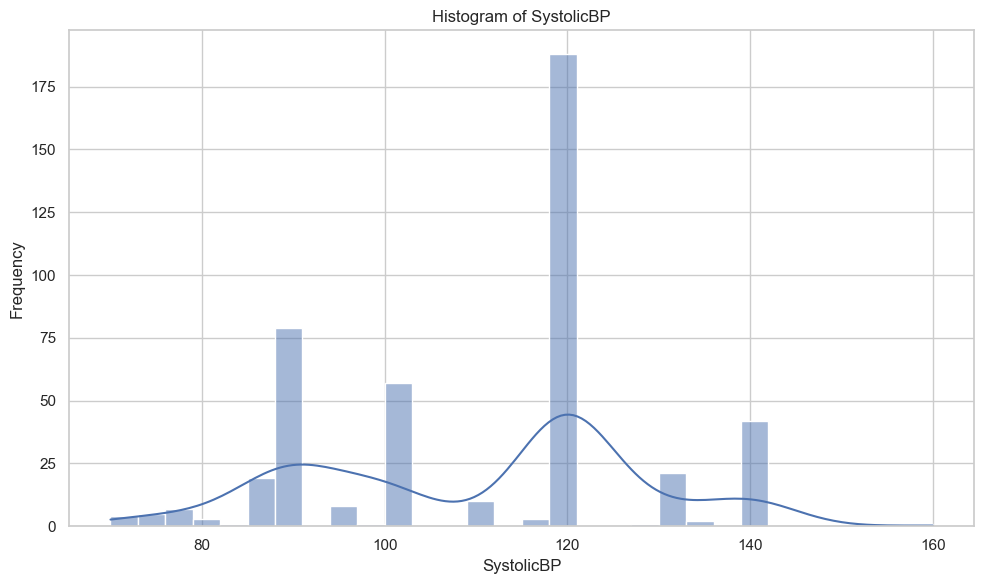

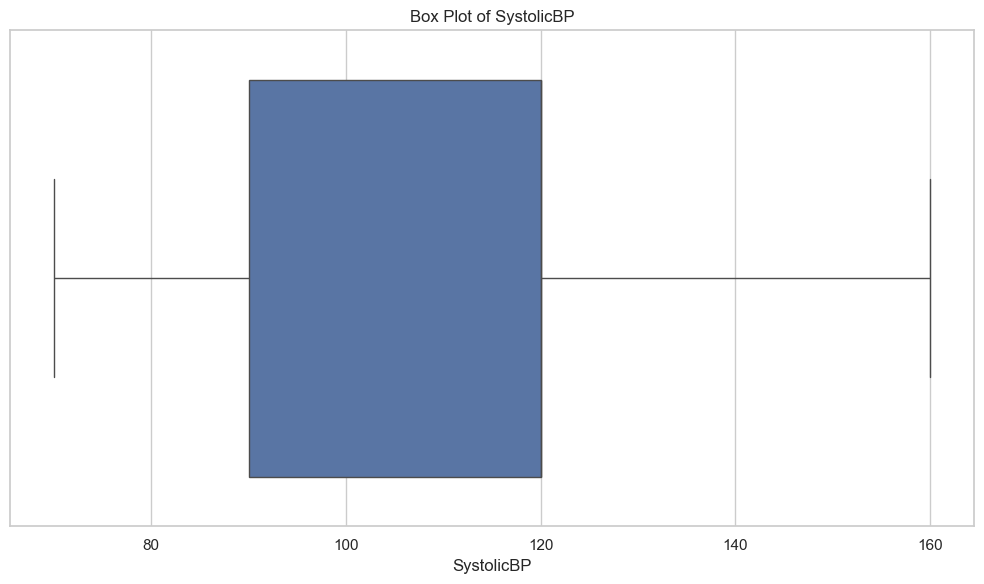

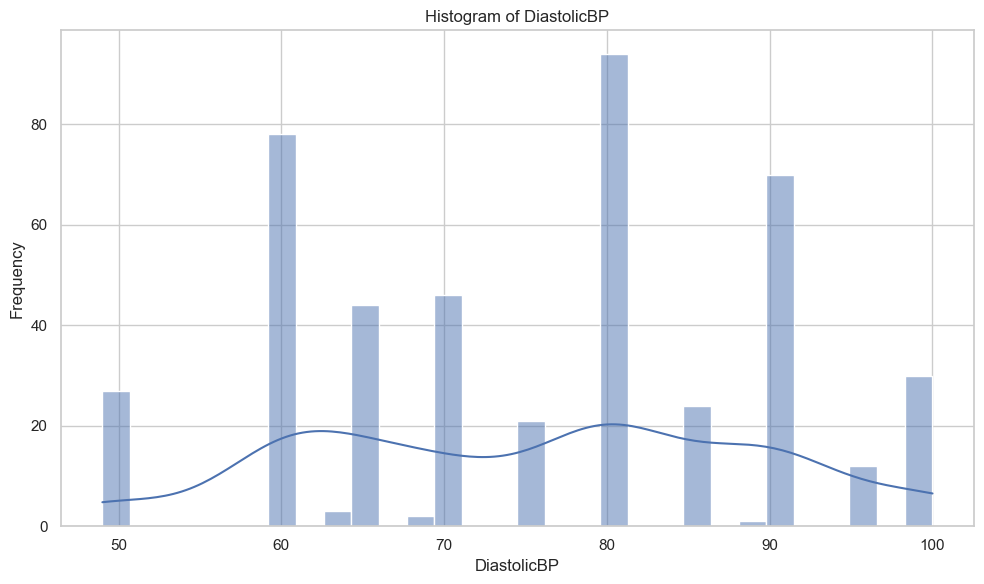

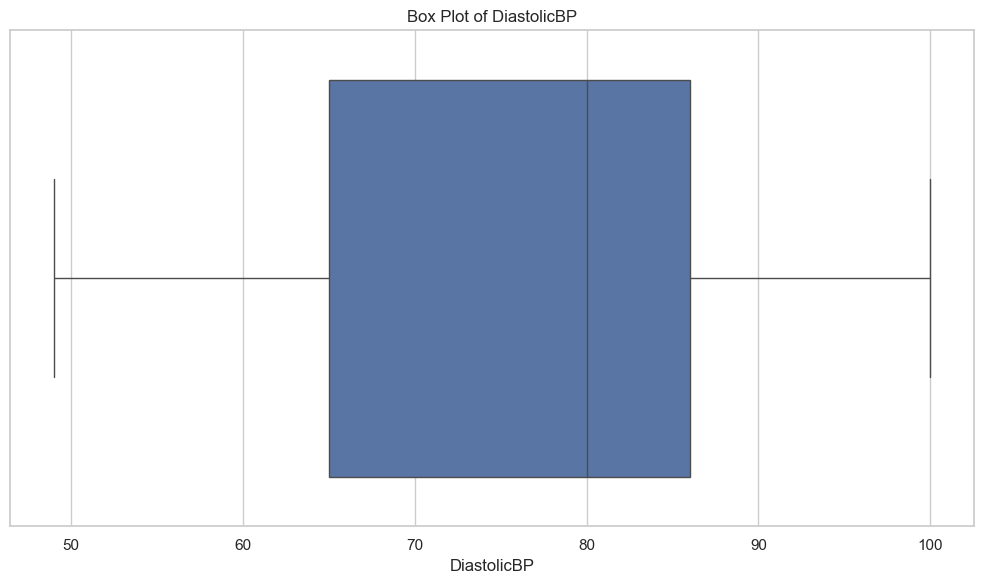

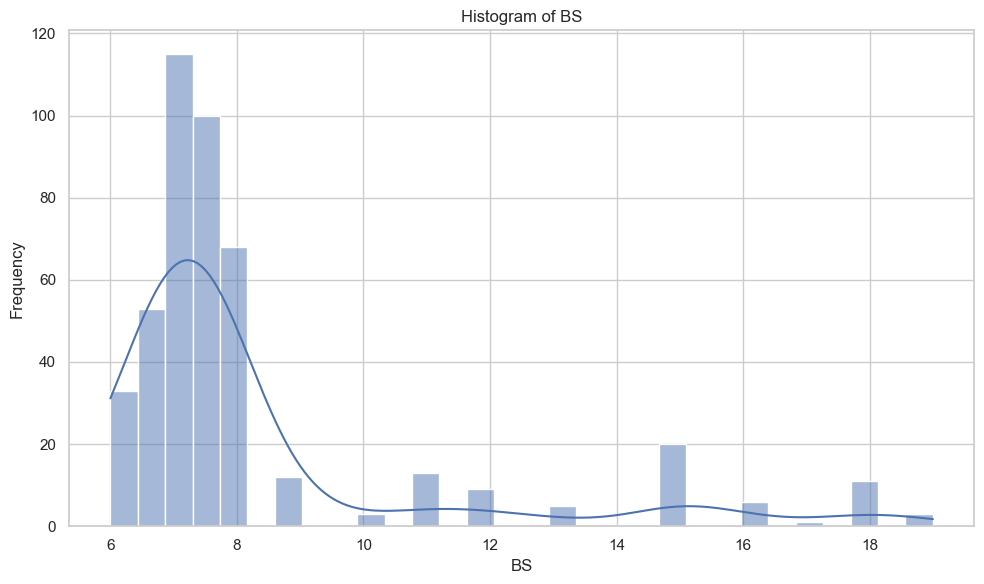

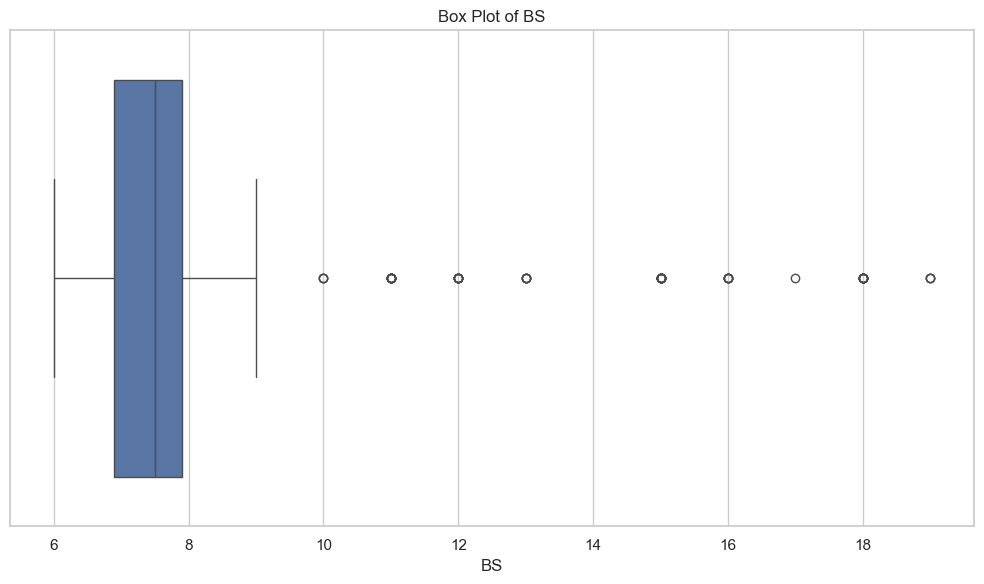

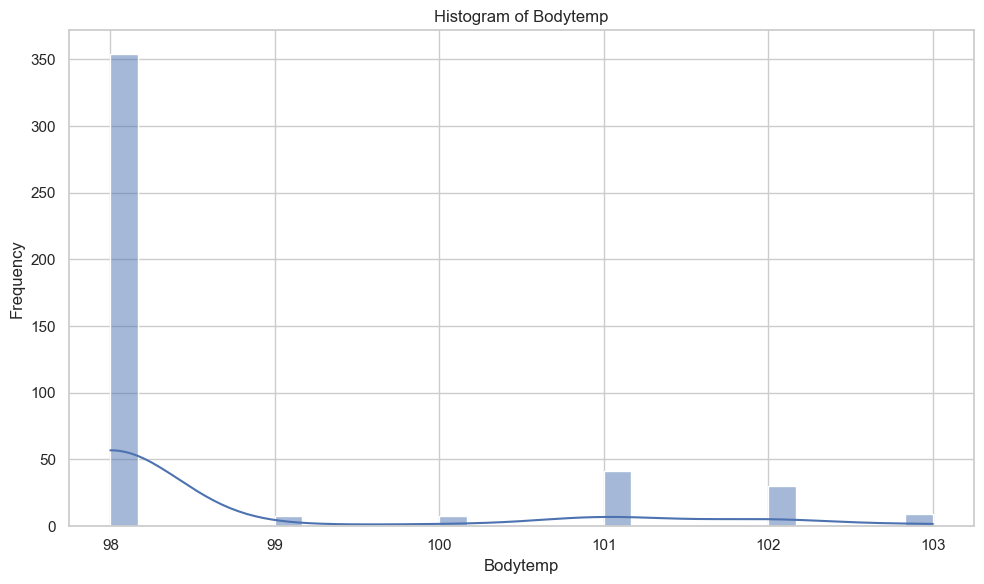

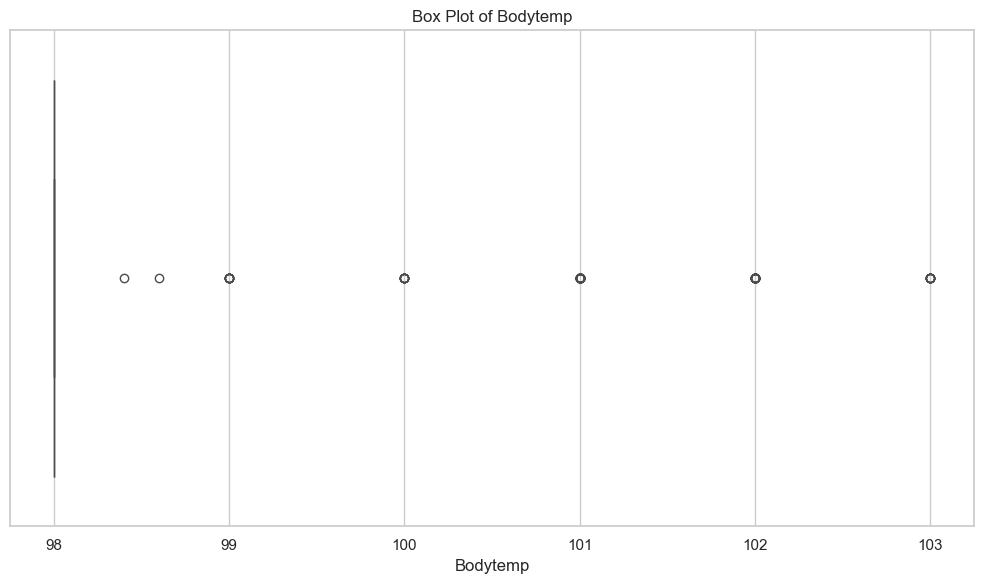

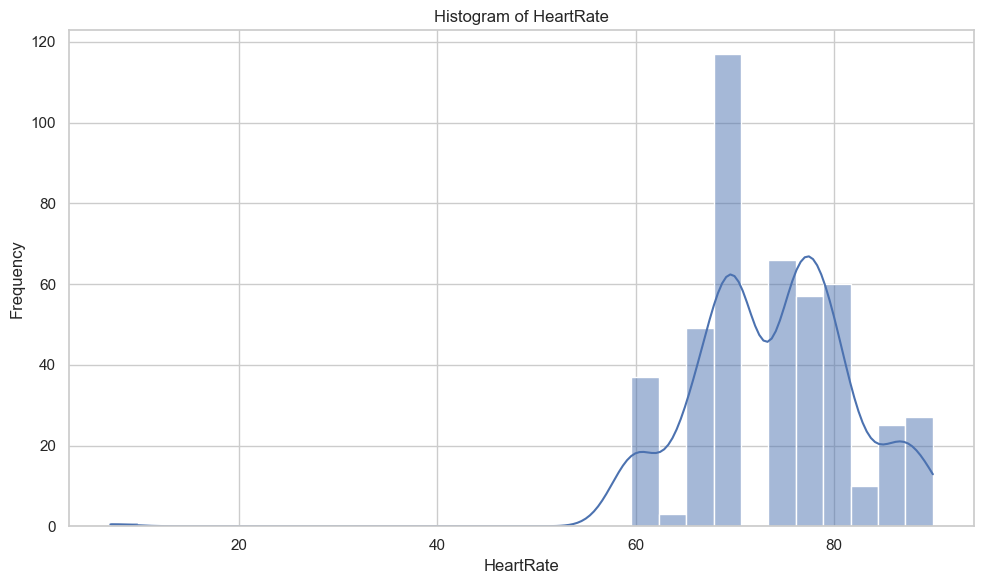

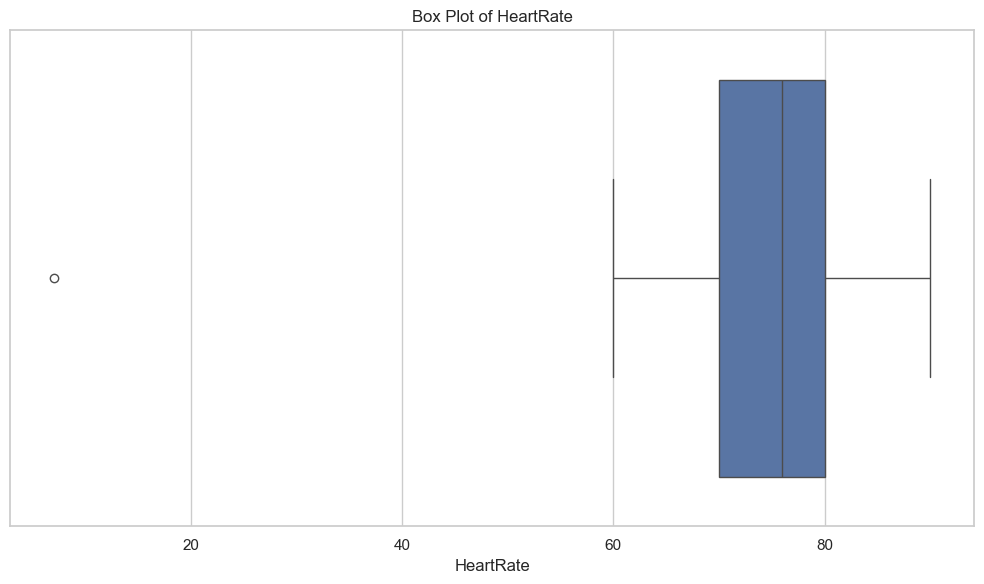

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("\n===== FREQUENCY DISTRIBUTIONS FOR CATEGORICAL VARIABLES =====")
cat_cols = ds.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nValue Counts for '{col}':")
    print(ds[col].value_counts())

# Plot frequency distributions (limiting to the top 10 categories for readability)
top_n = 10
for col in cat_cols:
    plt.figure()
    order = ds[col].value_counts().nlargest(top_n).index
    sns.countplot(y=col, data=ds, order=order)
    plt.title(f"Frequency Distribution of {col} (Top {top_n})")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# 2.3 Histograms and Box Plots for Numerical Variables
for col in numeric_cols:
    plt.figure()
    sns.histplot(ds[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    plt.figure()
    sns.boxplot(x=ds[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### Bivariate Analysis ###

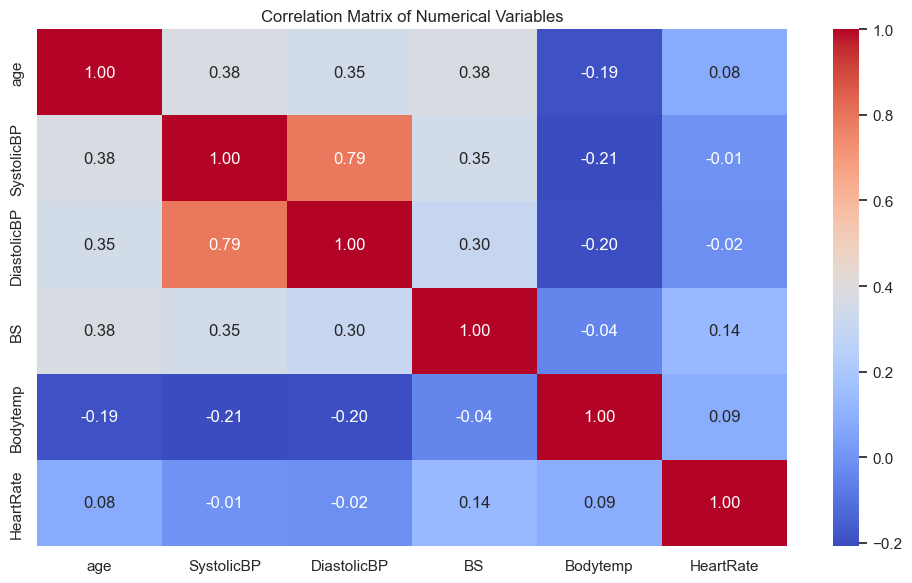

In [10]:
# 3.1 Correlation Matrix for Numerical Variables
corr_matrix = ds[numeric_columns].corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()

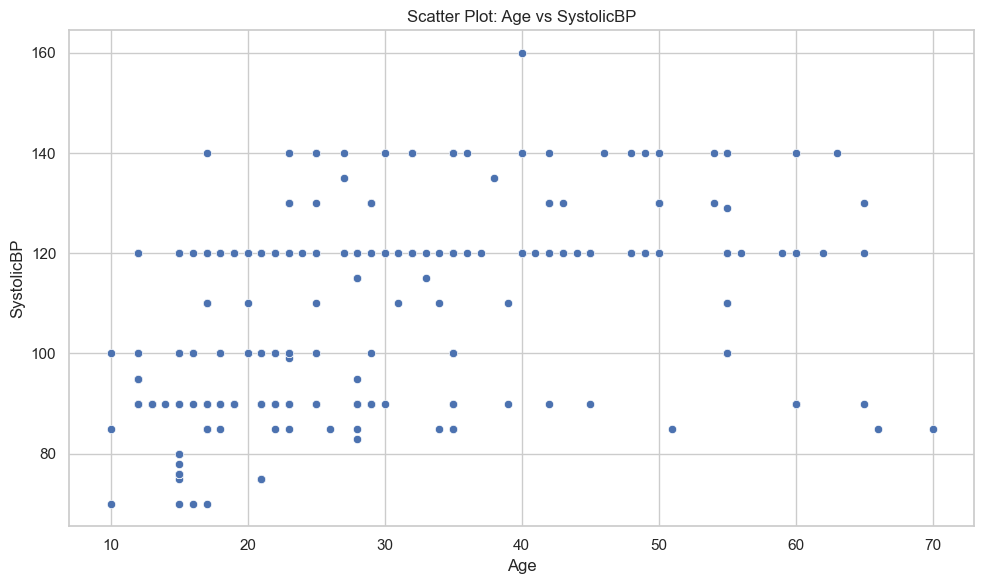

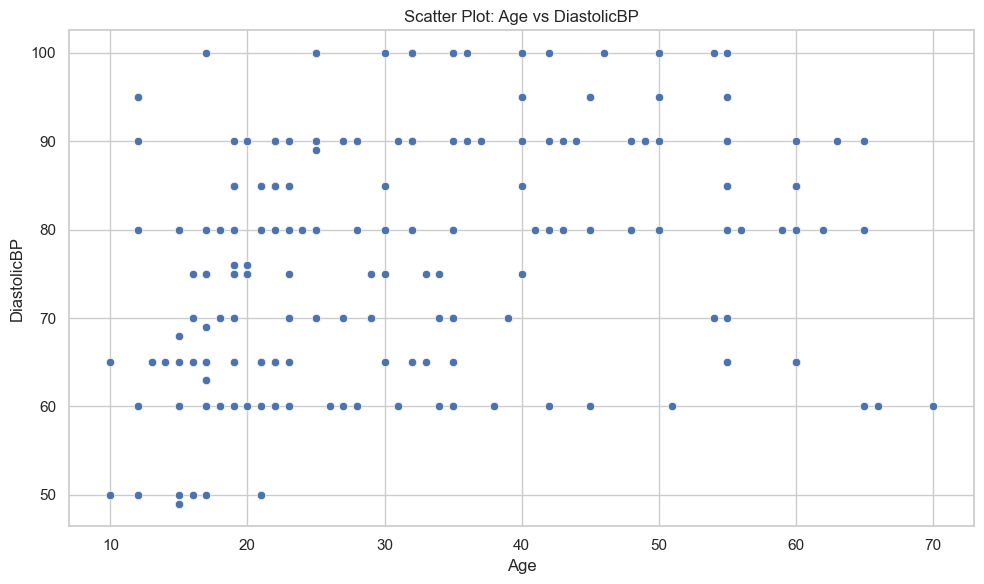

In [11]:
# 3.2 Scatter Plots for Continuous Variable Relationships
# Example: age vs. SystolicBP and age vs. DiastolicBP
plt.figure()
sns.scatterplot(x='age', y='SystolicBP', data=ds)
plt.title("Scatter Plot: Age vs SystolicBP")
plt.xlabel("Age")
plt.ylabel("SystolicBP")
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(x='age', y='DiastolicBP', data=ds)
plt.title("Scatter Plot: Age vs DiastolicBP")
plt.xlabel("Age")
plt.ylabel("DiastolicBP")
plt.tight_layout()
plt.show()

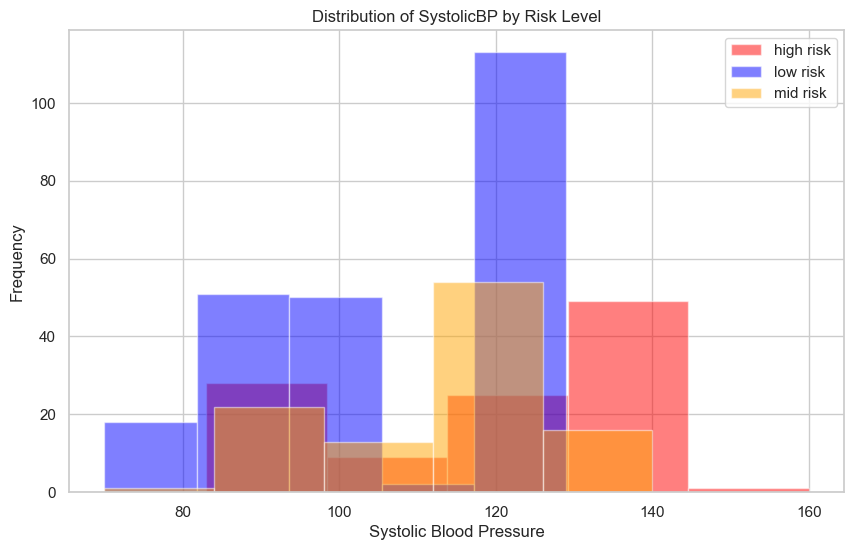

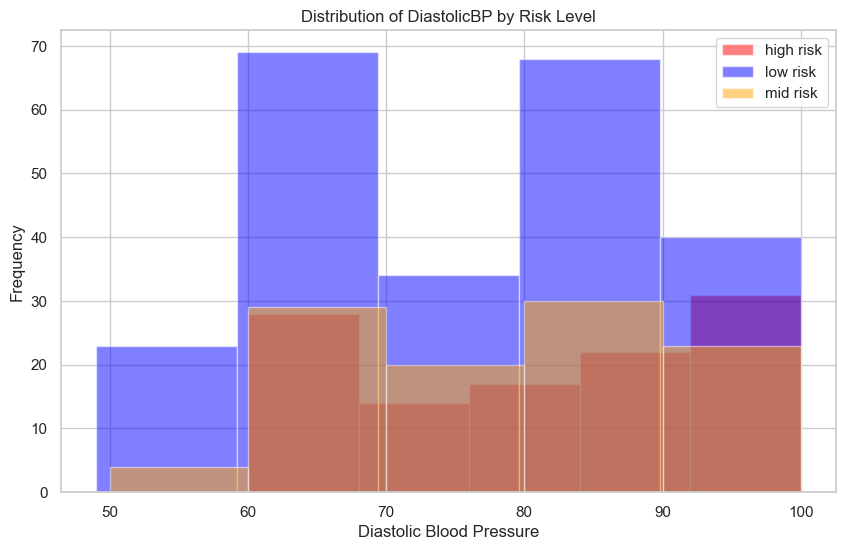

In [14]:
# 3.3 Compare Categorical and Numerical Variables
# Bar Plot: Distribution of SystolicBP by Risk Level

plt.figure(figsize=(10, 6))
colors = {'low risk': 'blue', 'mid risk': 'orange', 'high risk': 'red'}

for level in ds['RiskLevel'].unique():
    subset = ds[ds['RiskLevel'] == level]['SystolicBP']
    plt.hist(subset, bins=5, alpha=0.5, label=level, color=colors[level])

plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of SystolicBP by Risk Level')
plt.legend()
plt.grid(True)
plt.show()

# Bar Plot: Distribution of DiastolicBP by Risk Level
for level in ds['RiskLevel'].unique():
    subset = ds[ds['RiskLevel'] == level]['DiastolicBP']
    plt.hist(subset, bins=5, alpha=0.5, label=level, color=colors[level])

plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of DiastolicBP by Risk Level')
plt.legend()
plt.grid(True)
plt.show()


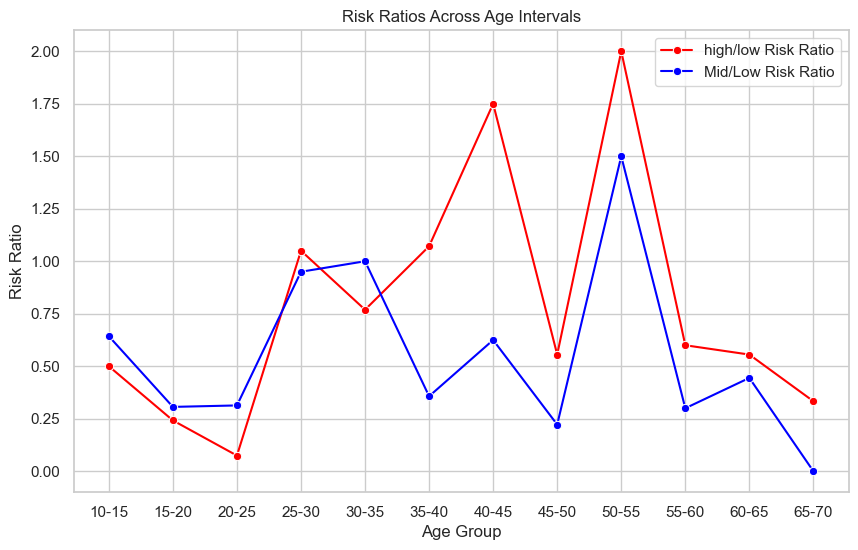

In [15]:
#3.4 comparison of ratio of `high risk to low risk` and `mid risk to low risk` as age increases

bins = [10,15,20,25,30,35,40,45,50,55,60,65,70]
labels = ['10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70']

ds['AgeGroup'] = pd.cut(ds['age'], bins=bins, labels=labels, right=False)
risk_counts = ds.groupby(['AgeGroup', 'RiskLevel'],observed=False).size().unstack(fill_value=0)

# Compute High-to-Low risk ratio
risk_counts['High_to_Low_Ratio'] = risk_counts['high risk'] / risk_counts['low risk'].replace(0, float('nan'))  # Avoid division by zero
risk_counts.reset_index(inplace=True)
risk_counts['Mid_to_Low_Ratio'] = risk_counts['mid risk'] / risk_counts['low risk'].replace(0, float('nan'))
risk_counts.reset_index(inplace=True)

plt.figure()
sns.lineplot(x='AgeGroup', y='High_to_Low_Ratio', data=risk_counts, marker='o', color='red',label='high/low Risk Ratio')
sns.lineplot(x='AgeGroup', y='Mid_to_Low_Ratio', data=risk_counts, marker='o', color='blue',label='Mid/Low Risk Ratio')
plt.title("Risk Ratios Across Age Intervals")
plt.xlabel("Age Group")
plt.ylabel("Risk Ratio")
plt.show()


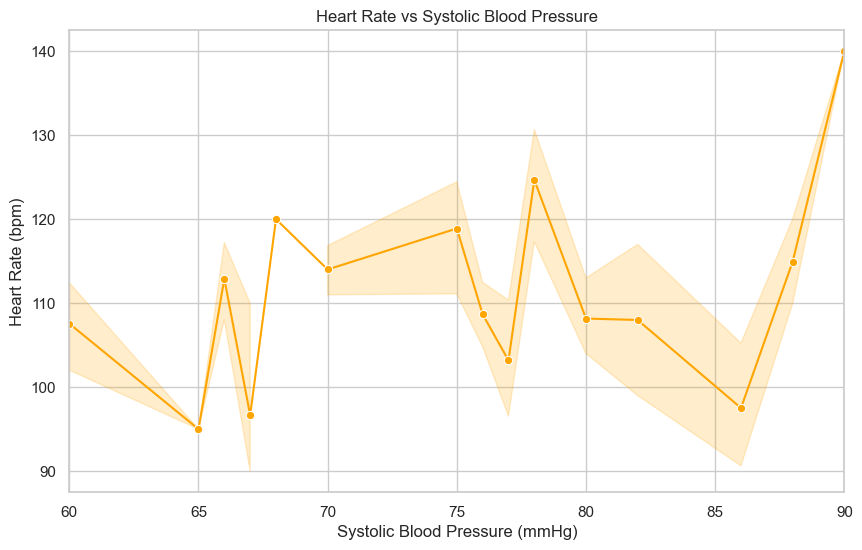

In [16]:
#3.5 comparison of heartRate with SystolicBP
sns.lineplot(x='HeartRate', y='SystolicBP',data=ds,marker='o',color='orange')
plt.title("Heart Rate vs Systolic Blood Pressure")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.xlim(60,90)
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.show()

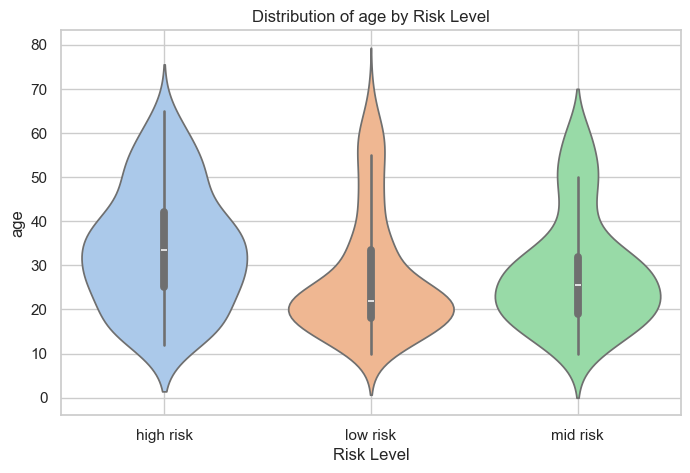

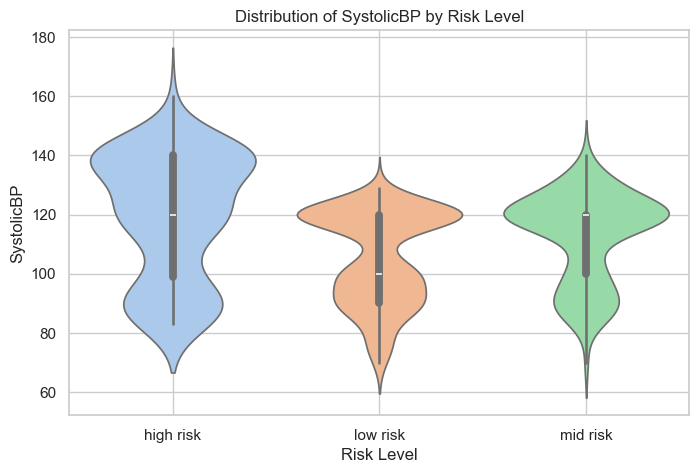

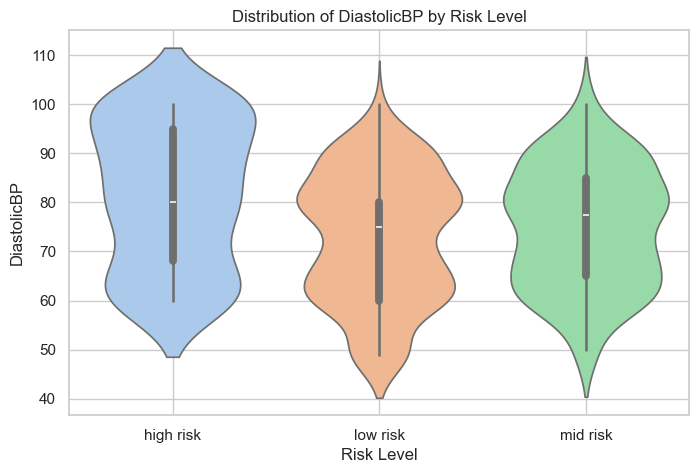

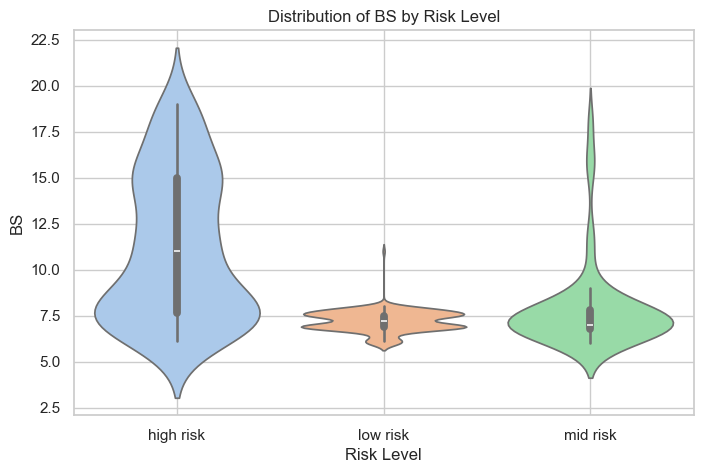

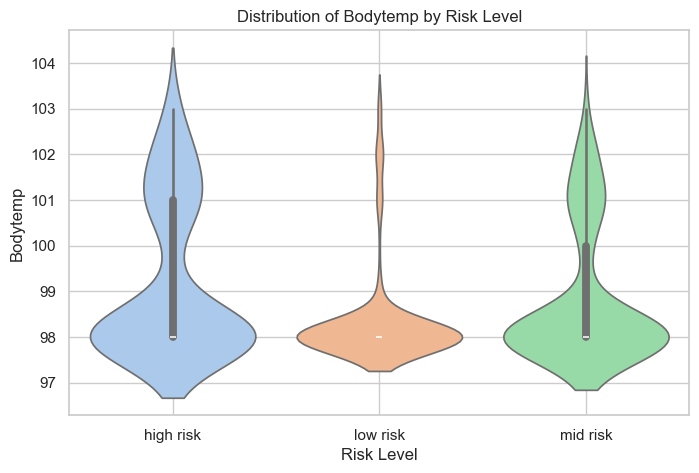

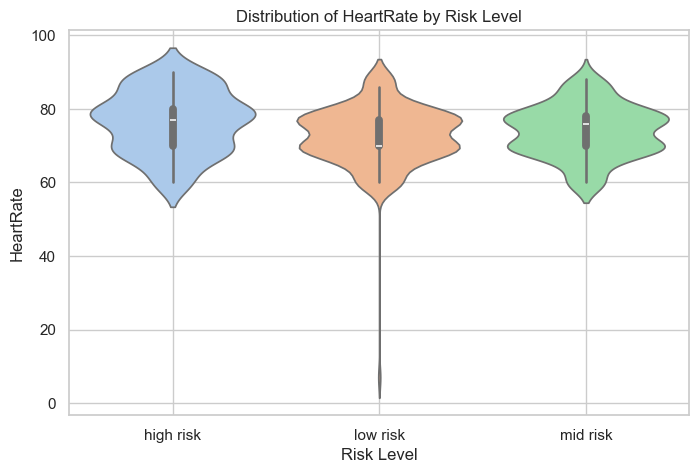

In [17]:
#violin plots between different numerical variables
for var in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='RiskLevel', y=var, data=ds,hue='RiskLevel', palette="pastel")
    plt.title(f"Distribution of {var} by Risk Level")
    plt.xlabel("Risk Level")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

### Multivariate Analysis ###

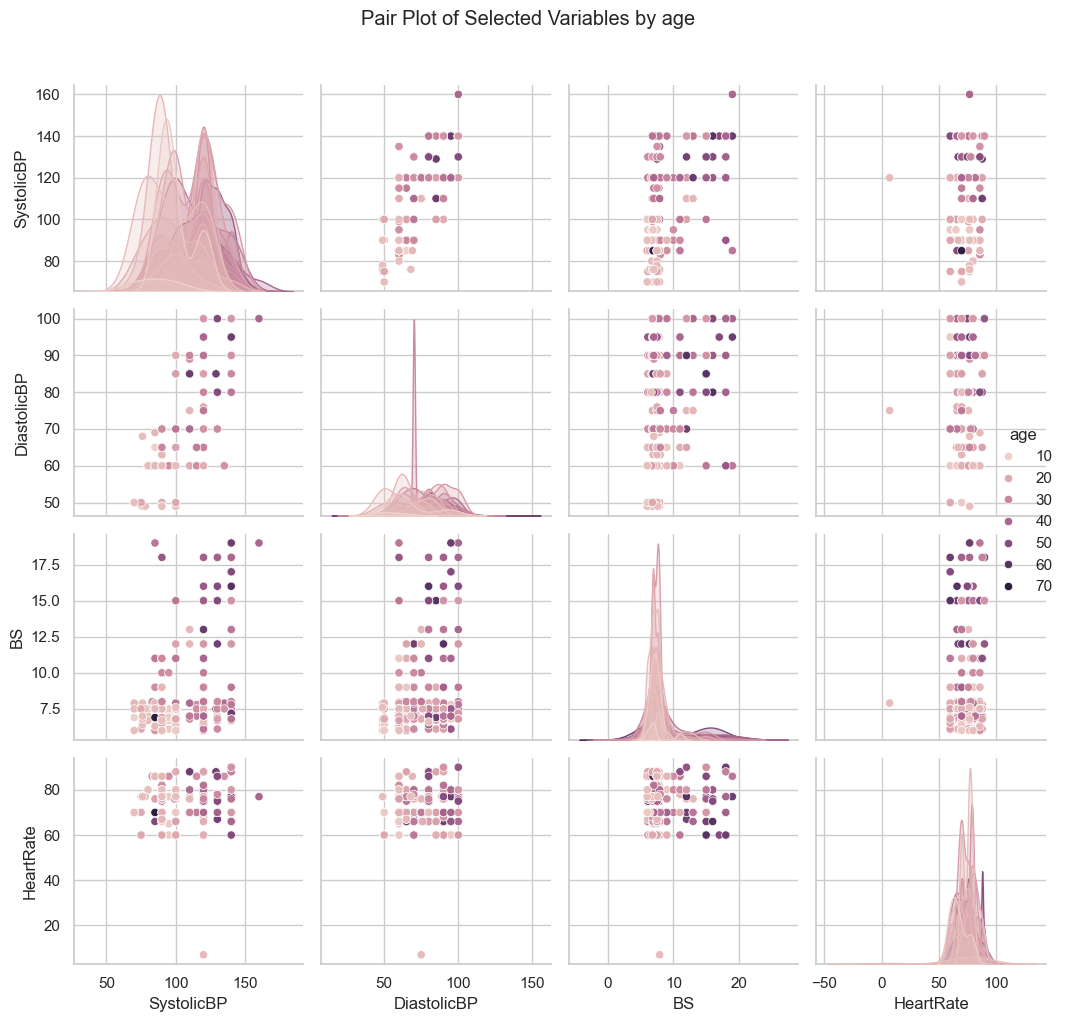

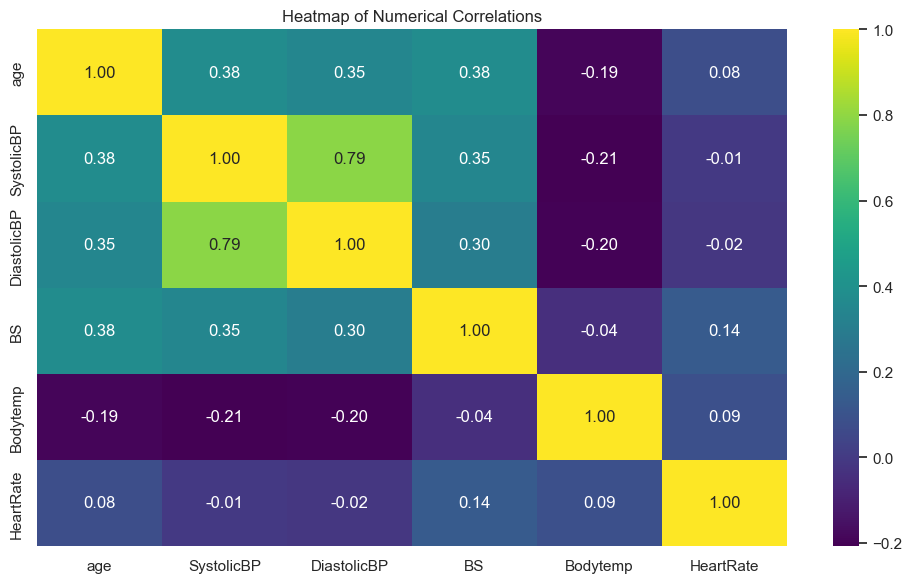


===== GROUPED COMPARISONS ( HeartRate by age and Risk Level) =====
     age  RiskLevel  HeartRate
0     10   low risk  70.000000
1     10   mid risk  70.000000
2     12  high risk  63.000000
3     12   low risk  67.909091
4     12   mid risk  68.500000
..   ...        ...        ...
100   63  high risk  90.000000
101   65  high risk  86.000000
102   65   low risk  73.000000
103   66   low risk  86.000000
104   70   low risk  70.000000

[105 rows x 3 columns]


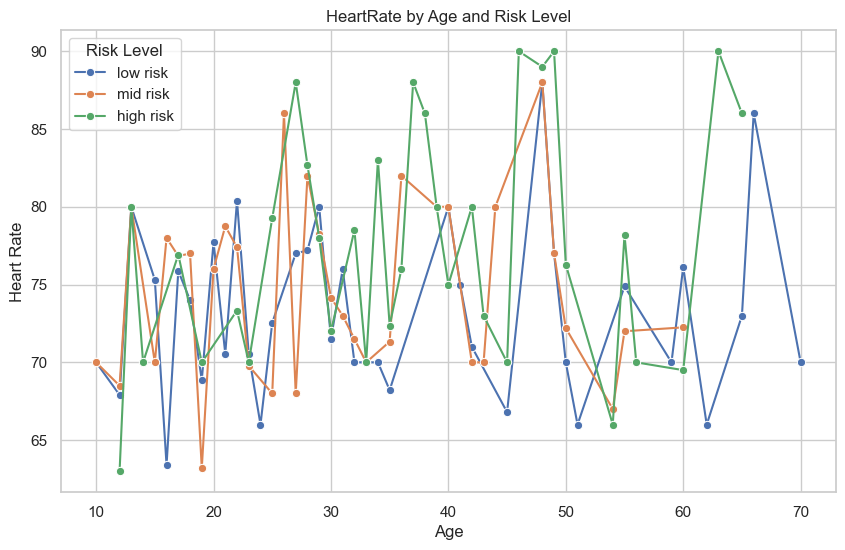

In [18]:
# 4.1 Pair Plots for Multiple Variables
# Select a few key numeric columns and use 'age' as hue for differentiation
subset_cols = ['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']
sns.pairplot(ds[subset_cols + ['age']], hue='age')
plt.suptitle("Pair Plot of Selected Variables by age", y=1.02)
plt.tight_layout()
plt.show()

# 4.2 Heatmap (Reiterating correlation for emphasis)
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap of Numerical Correlations")
plt.tight_layout()
plt.show()

# 4.3 Grouped Comparisons: SystolicBP and DiastolicBP by age and risklevel
grouped_data = ds.groupby(['age', 'RiskLevel'])[['HeartRate']].mean().reset_index()
print("\n===== GROUPED COMPARISONS ( HeartRate by age and Risk Level) =====")
print(grouped_data)

sns.lineplot(x='age', y='HeartRate', hue='RiskLevel', data=grouped_data, marker='o')
plt.title("HeartRate by Age and Risk Level")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(title="Risk Level")
plt.grid(True)  
plt.show()

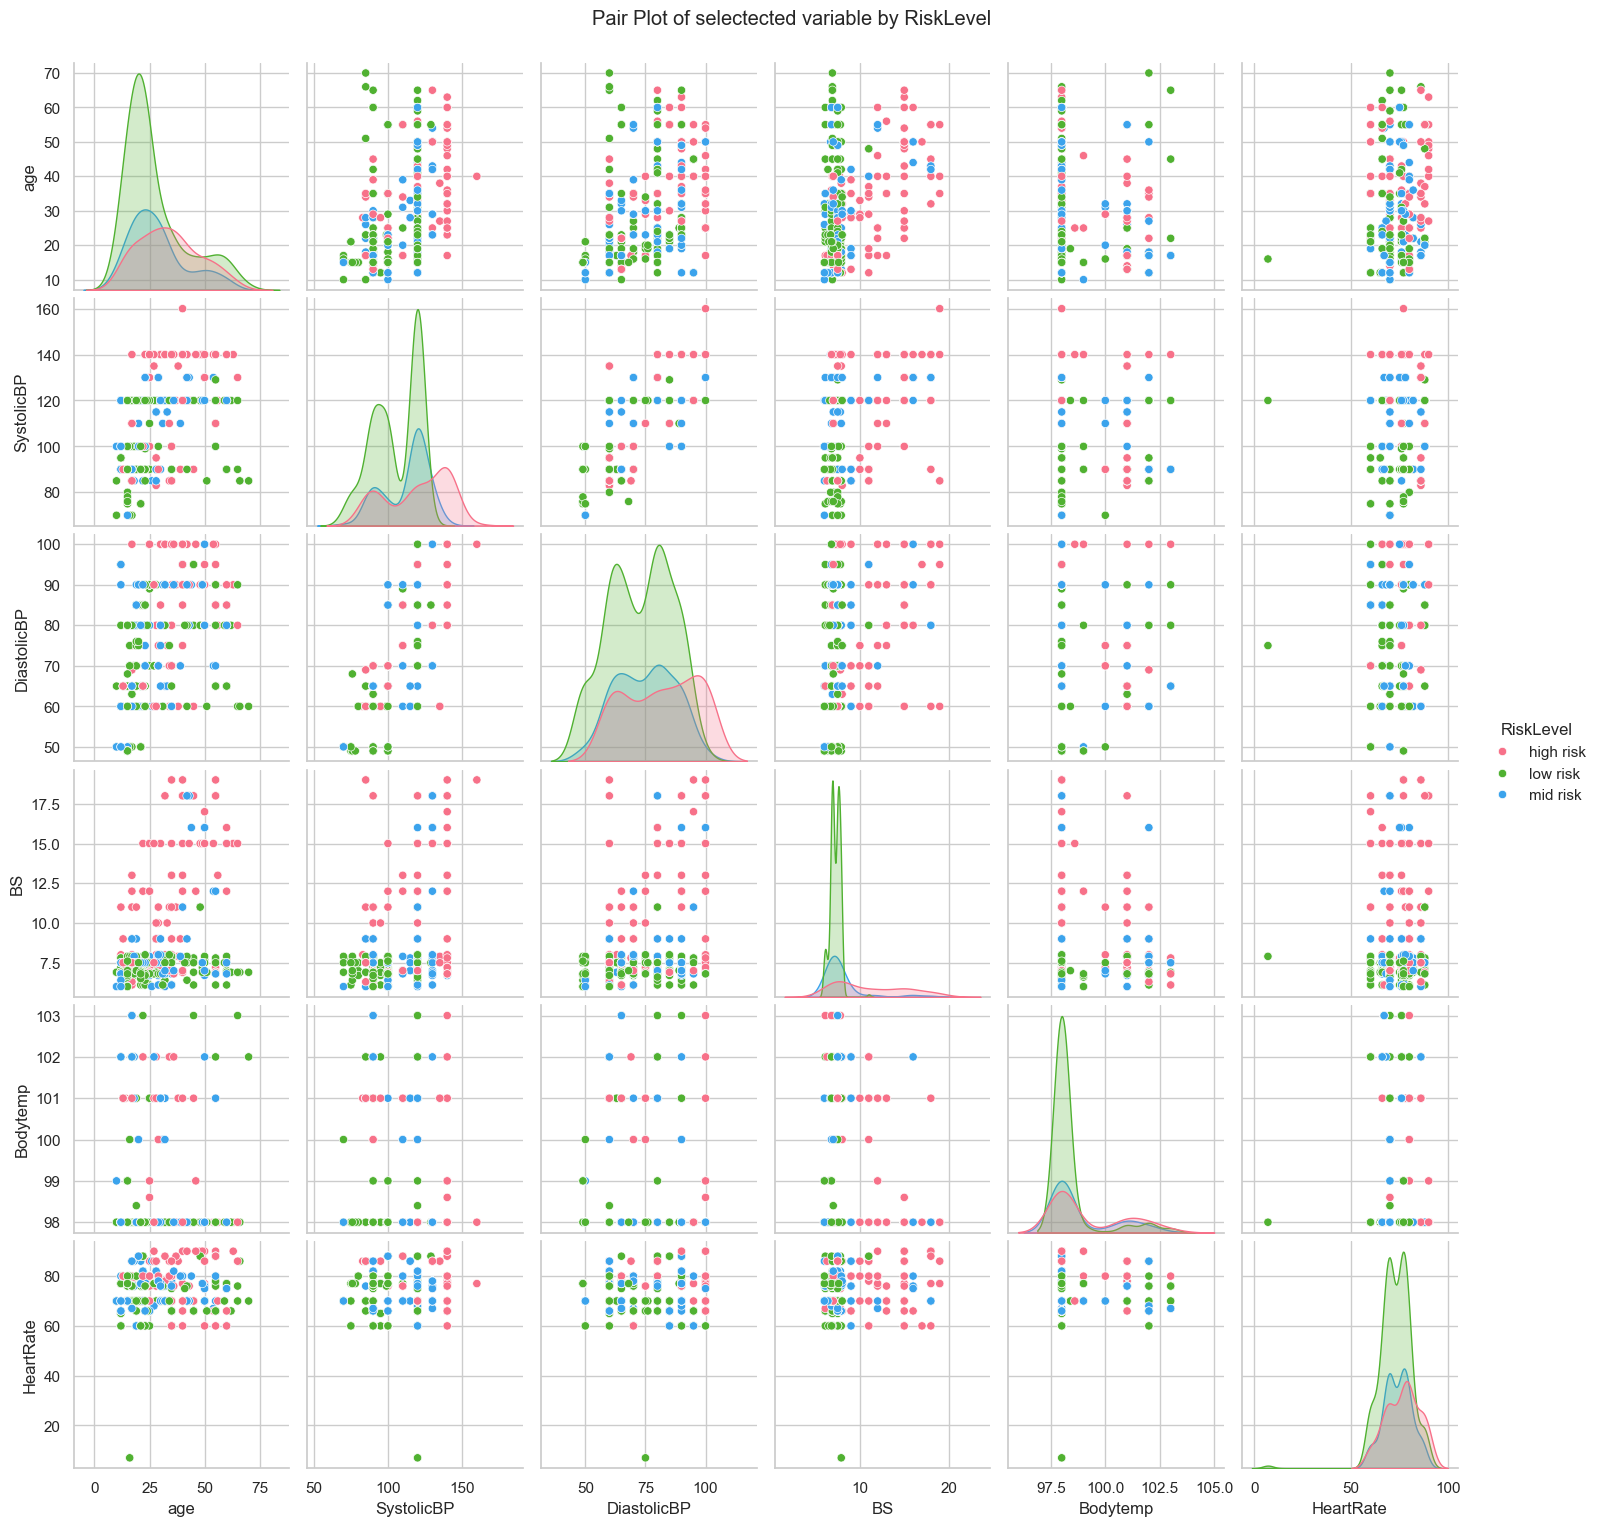

In [19]:
#pair plots of numerical variables by RiskLevel
sns.pairplot(ds, hue='RiskLevel', diag_kind='kde', palette="husl")
plt.suptitle("Pair Plot of selectected variable by RiskLevel",y=1.02)
plt.show()

Grouped Statistics

  AgeGroup  RiskLevel  HeartRate         SystolicBP        DiastolicBP       
                            mean median        mean median        mean median
0    20-40  high risk  77.215686   80.0  121.823529  130.0   82.156863   80.0
1    20-40   low risk  72.912281   70.0  107.403509  120.0   75.175439   80.0
2    20-40   mid risk  74.879310   76.0  114.310345  120.0   75.000000   72.5
3    40-60  high risk  77.121212   77.0  129.696970  130.0   89.848485   90.0
4    40-60   low risk  72.709677   70.0  115.290323  120.0   80.967742   80.0
5    40-60   mid risk  73.687500   70.0  123.125000  120.0   84.062500   80.0
6    60-80  high risk  75.666667   76.0  131.666667  135.0   84.166667   82.5
7    60-80   low risk  75.153846   76.0  103.076923   90.0   71.538462   65.0
8    60-80   mid risk  72.250000   76.0  112.500000  120.0   77.500000   80.0


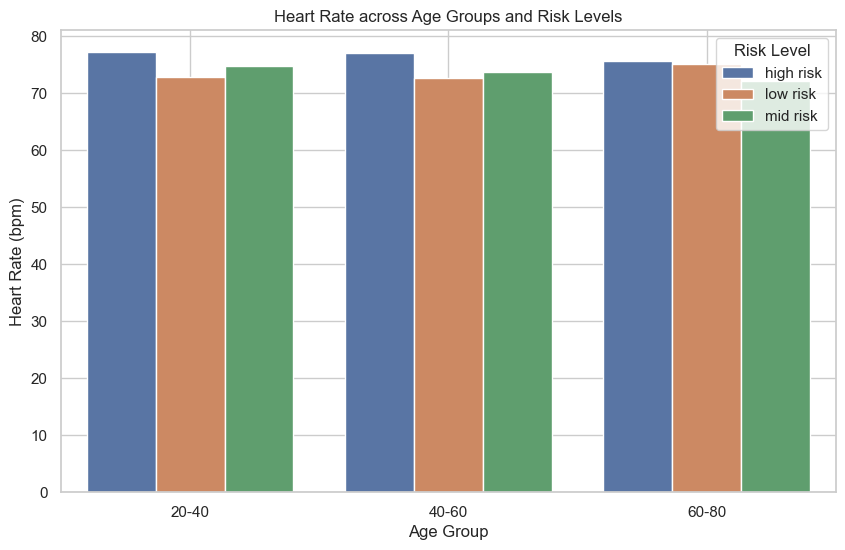

In [20]:
#categorizing `age` into different subgroups helps to better understand multivariable relationships
#here i am taking age groups of [(20-40),(40-60),(60-80)]

bins = [20, 40, 60, 80]  
labels = ['20-40', '40-60', '60-80']
ds['AgeGroup'] = pd.cut(ds['age'], bins=bins, labels=labels, right=False)

#Grouped_Statistics
print("Grouped Statistics\n")
grouped_stats = ds.groupby(['AgeGroup',  'RiskLevel'],observed=True).agg({
    'HeartRate': ['mean', 'median'],
    'SystolicBP': ['mean', 'median'],
    'DiastolicBP': ['mean', 'median']
}).reset_index()
print(grouped_stats)

#Bar Plot: Heart Rate vs AgeGroup & RiskLevel
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='HeartRate', hue='RiskLevel', data=ds, errorbar=None)
plt.title("Heart Rate across Age Groups and Risk Levels")
plt.xlabel("Age Group")
plt.ylabel("Heart Rate (bpm)")
plt.legend(title="Risk Level")
plt.grid(True)
plt.show()


## REPORT AND OBSERVATION ##

Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.

Age, `Systolic Blood Pressure` as SystolicBP(in mmHg), `Diastolic BP` as DiastolicBP(in mmHg), `Blood Sugar` as BS(inmilligrams per deciliter (mg/dL)),` Body Temperature` as BodyTemp(in degree celcius), `HeartRate(bpm)` and `RiskLevel`. All these are the responsible and significant risk factors for maternal mortality, that is one of the main concern of SDG of UN.

The dataset is consisted of a total of 1014 rows. 

Each row has 7 columns. Out of which 6 are numeric variable (Age , SystolicBP,DiastolicBP, BS, Bodytemp, HeartRate). Whereas Risklevel is categorial based.

#### Initially I performed the method of data loading and cleaning.
1. first i figured out the number of rows having missing entries.
2. Fortunately, There were no such rows.
3. Then, I found number of duplicate rows as to remove redundancies in the given dataset.
4. Out of 1014 rows 562 were duplicates (thats a lot, which should be obvious in this type of dataset)
5. Removing these redundant rows helps to improve the processing time by almost 50 percent.

After performing data cleaning and loading , I extracted the summary of the dataset of all the numeric varaibles.
here is the overall summary:\
          `age` `SystolicBP` `DiastolicBP` `BS`	    `Bodytemp`	`HeartRate`\
`count`	1014.000000	1014.000000	1014.000000	1014.000000	1014.000000	1014.000000\
`mean`	29.871795	113.198225	76.460552	8.725986	98.665089	74.301775\
`std`	13.474386	18.403913	13.885796	3.293532	1.371384	8.088702\
`min`	10.000000	70.000000	49.000000	6.000000	98.000000	7.000000\
`25%`	19.000000	100.000000	65.000000	6.900000	98.000000	70.000000\
`50%`	26.000000	120.000000	80.000000	7.500000	98.000000	76.000000\
`75%`	39.000000	120.000000	90.000000	8.000000	98.000000	80.000000\
`max`	70.000000	160.000000	100.000000	19.000000	103.000000	90.000000\


#### Data exploration and finding relations among variables.
I performed three types of data exploration in the provided data set 

1. **Univariate Analysis** -> In this I plotted the frequency histogram plot of different variables
  Then i plotted the box plot showing the spread out of the data like the outliers and quartiles.

2. **Bivariate Analysis** -> This analysis revealed the correlations between different variables present in the dataset using the correlation matrix.
I also plotted the scatter plots of blood pressure with respect to age. This analysis also includes the various comparision plots among different variables. And finally Violin plots of all the numerical variables taking RiskLevel as a heuristic for differentiation.

3. **Multivariate Analysis** -> Most of the simpler relational graphs were captured using univariate and bivariate analysis but to capture more complex
   relations between the variables I used multivariate Analysis. For this I plotted different pair plots first by age then by risk level.
   For better correaltion emphasis i plotted the heatmap of all the numeric varaibles.I also performed grouped analysis , first plotting heartrate      by risk level and age. Then grouping age in 3 different subgroups [(20-40),(40-60),(60-80)].

   
### OBSERVATION ###
After performing the Analysis and graph plotting. Following are the major observations that I made :-

**1. High correlation between the increased heart rate and risk level.As the heart Rate of the person increases the chances of having high risk in pregnancy also increseas.**


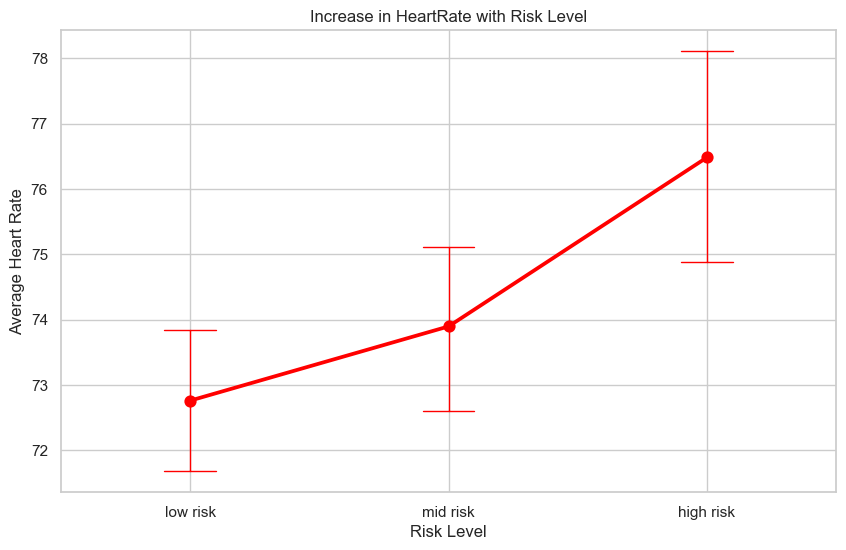

In [38]:
#The following graph shows the relation between increased heartRate and high risk.

risk_order = ["low risk", "mid risk", "high risk"]
plt.figure(figsize=(10, 6))
sns.pointplot(x="RiskLevel", y="HeartRate", data=ds, order=risk_order, 
              estimator='mean', capsize=0.2, err_kws={'linewidth': 1}, color='red', markers='o')
plt.title("Increase in HeartRate with Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Average Heart Rate")
plt.grid(True)
plt.show()

**2.** **Next I observed that the age plays an important factor in determining the chances of healthy pregnancy.
   Women getting pregnant at higher age have high chances of risk as compared to women of the age group (20-30).**

*The decreasing nature at the end sights the fact that the number of women getting pregnant at that age group is lesser as compared to earlier groups* 

   Here is the Plot showing this relation.

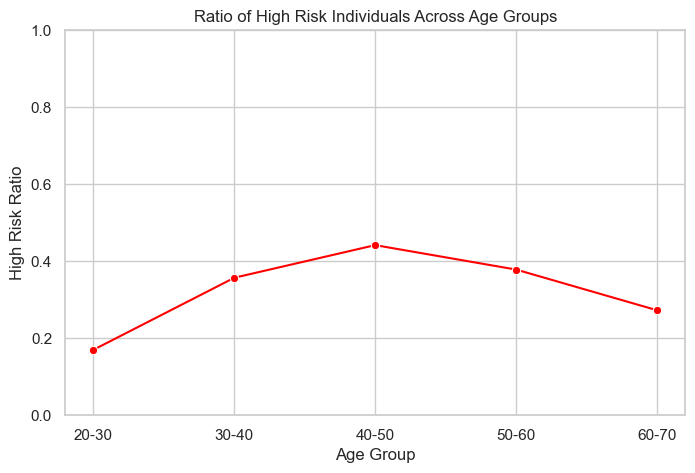

In [37]:
#plot showing the relation between high risk and at higer age

bins = [20, 30, 40, 50, 60, 70]
labels = ["20-30", "30-40", "40-50", "50-60", "60-70"]

ds["AgeGroup"] = pd.cut(ds["age"], bins=bins, labels=labels, right=False)
risk_counts = ds.groupby(["AgeGroup", "RiskLevel"],observed=False).size().unstack().fillna(0)

risk_counts["Total"] = risk_counts.sum(axis=1)
risk_counts["High_Risk_Ratio"] = risk_counts["high risk"] / risk_counts["Total"]

# Plot the high-risk ratio
plt.figure(figsize=(8, 5))
sns.lineplot(x=risk_counts.index, y=risk_counts["High_Risk_Ratio"], marker='o', color='red')
plt.title("Ratio of High Risk Individuals Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("High Risk Ratio")
plt.ylim(0, 1)  # The ratio is between 0 and 1
plt.grid(True)
plt.show()

######### The decreasing nature at the end sights the fact that the number of women getting pregnant at that age group is lesser as compared to earlier groups